In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Embedding, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import time

In [6]:

# Read the CSV file into a pandas DataFrame
train_df = pd.read_csv('../datasets/train_set.csv')

train_df = train_df.drop(columns=['Assembly Code', 'Assembly Description', 'Type Name'])

# Define preprocessing for categorical features
categorical_features = ['Family', 'SubFamily', 'ObjectGroup', 'ObjectName', 'Description', 'Type Comments', 'Structural Material', 'Material']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and testing sets
X = train_df.drop('Category', axis=1)
y = train_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# Initialize LabelEncoder
label_encoder = LabelEncoder()

y_encoder = LabelEncoder()
y_train = y_encoder.fit_transform(y_train)
y_test_encoded = y_encoder.fit_transform(y_test)

In [10]:

# Start timing
start_time = time.time()

# Define the neural network model
model_cnn = Sequential([
    Embedding(input_dim=X_train.shape[1], output_dim=100, input_length=X_train.shape[1]),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(train_df['Category'].unique()), activation='softmax')
])

# Compile and train the model
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_cnn.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_data=(X_test_processed, y_test_encoded))

# End timing
end_time = time.time()
# Evaluate the model on the testing set
loss, accuracy = model_cnn.evaluate(X_test_processed, y_test_encoded)
print("Test Accuracy:", accuracy)

# Calculate total runtime
total_time = end_time - start_time
print(f"Total runtime: {total_time} seconds")

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.0813 - loss: 3.4032 - val_accuracy: 0.0182 - val_loss: 3.3726
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - accuracy: 0.1796 - loss: 2.7613 - val_accuracy: 0.0182 - val_loss: 3.5141
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.1929 - loss: 2.7283 - val_accuracy: 0.0182 - val_loss: 3.7225
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - accuracy: 0.2091 - loss: 2.6823 - val_accuracy: 0.0182 - val_loss: 3.7903
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 167ms/step - accuracy: 0.2087 - loss: 2.6004 - val_accuracy: 0.0182 - val_loss: 3.6562
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.2068 - loss: 2.6130 - val_accuracy: 0.0182 - val_loss: 3.7552
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.2078 - loss: 2.5656 - val_accuracy: 0.0182 - val_loss: 3.7188
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - accuracy: 0.2054 - loss: 2.5270 - val_accu

KeyboardInterrupt: 

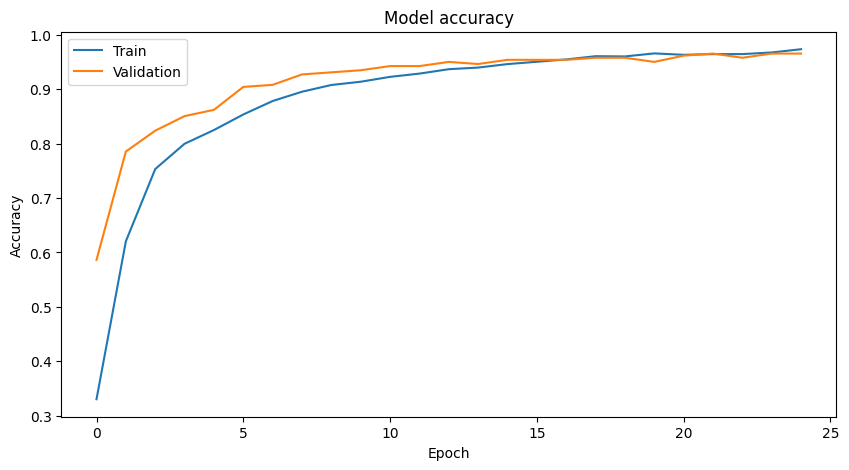

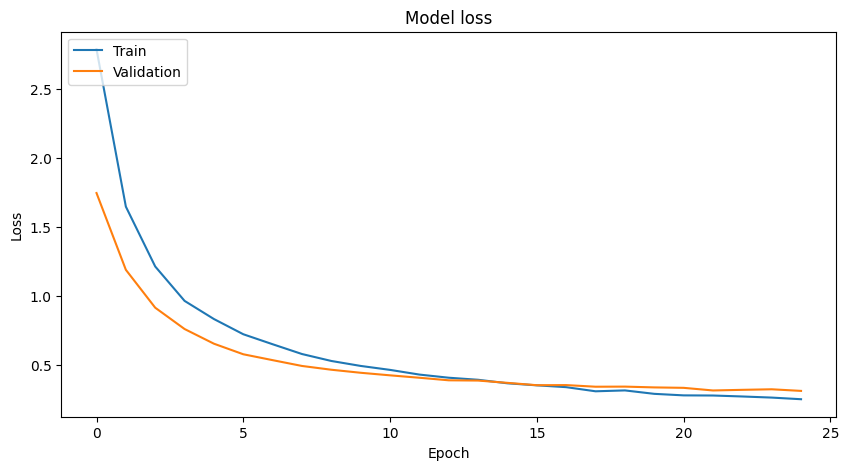

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:

# Save the model to disk
model_cnn.save('CNN_model_pipline.h5')
print("Model saved to disk.")


Model saved to disk.
